# Stock Price Prediction Using Time Series Forecasting

SUBMITTED BY -
*   Aditya Singh (2101331540009)


     
     


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_datareader as web
import warnings
import prophet

In [ ]:
data = pd.read_csv("NIFTY_data.csv")
data.head()

,date,Open,High,Low,close,Shares Traded,Turnover (₹ Cr)
0,05-Jun-23,18612.00,18640.15,18582.8,18593.85,"25,61,11,496.00",20369.16
1,06-Jun-23,18600.80,18622.75,18531.6,18599.00,"22,07,89,926.00",21957.47
2,07-Jun-23,18665.60,18738.95,18636.0,18726.40,"26,01,09,671.00",21482.77
3,08-Jun-23,18725.35,18777.90,18615.6,18634.55,"28,64,68,927.00",22762.30
4,09-Jun-23,18655.90,18676.65,18555.4,18563.40,"22,17,60,885.00",20181.42


<ipython-input-26-f3db2e8cbece>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['date'] = pd.to_datetime(data['date'])


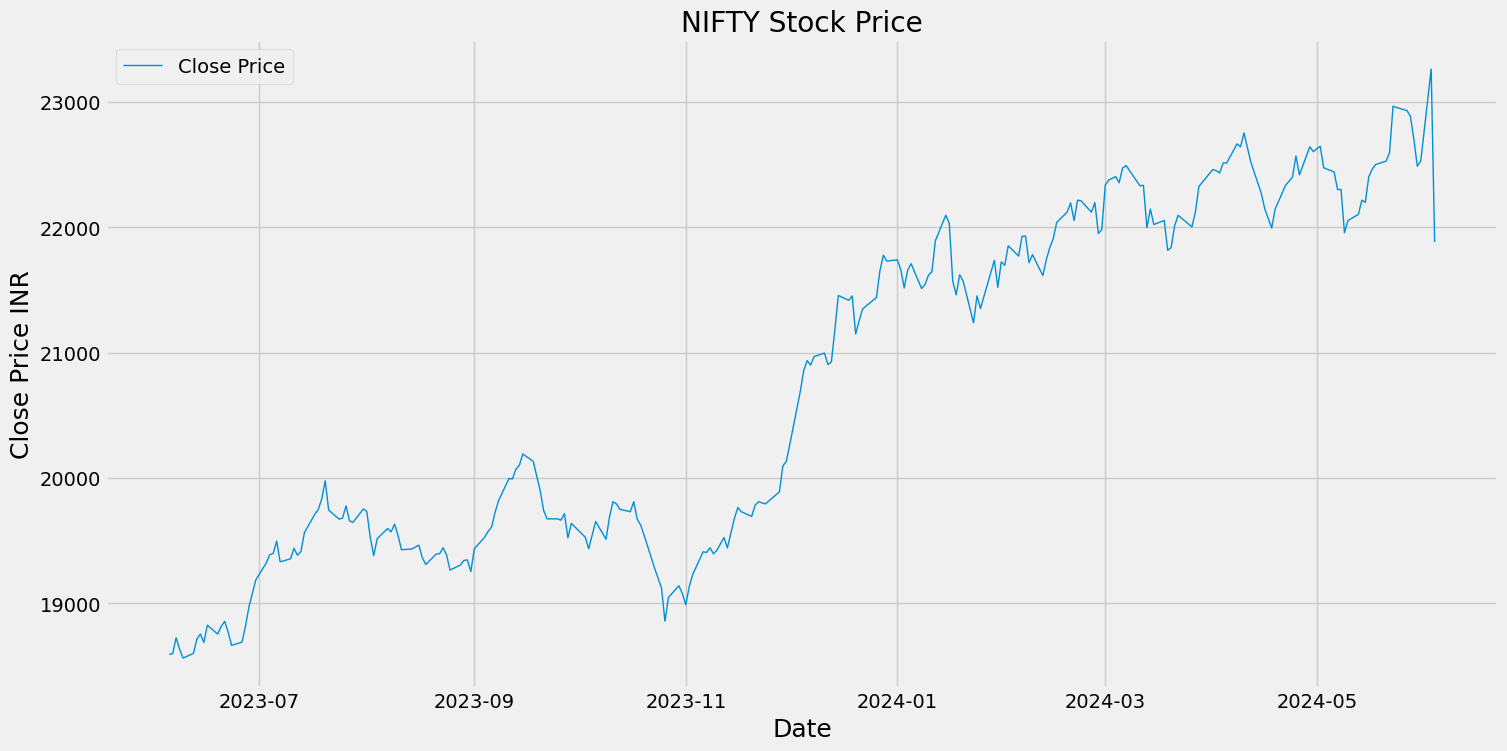

In [ ]:
data['date'] = pd.to_datetime(data['date'])
data.set_index('date', inplace=True)
plt.style.use("fivethirtyeight")
plt.figure(figsize=(16,8))
plt.title("NIFTY Stock Price")
plt.plot(data["close"], label='Close Price', linewidth=1)
plt.xlabel("Date", fontsize=18)
plt.ylabel("Close Price INR", fontsize=18)
plt.legend()
plt.show()

In [ ]:
data = data[["date","close"]]
data = data.rename(columns = {"date":"ds","close":"y"})
data.head()

,ds,y
0,05-Jun-23,18593.85
1,06-Jun-23,18599.00
2,07-Jun-23,18726.40
3,08-Jun-23,18634.55
4,09-Jun-23,18563.40


In [ ]:
data['ds'] = pd.to_datetime(data['ds']).dt.tz_localize(None)
data.head()

<ipython-input-30-caf7de17795b>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['ds'] = pd.to_datetime(data['ds']).dt.tz_localize(None)


,ds,y
0,2023-06-05,18593.85
1,2023-06-06,18599.00
2,2023-06-07,18726.40
3,2023-06-08,18634.55
4,2023-06-09,18563.40


In [ ]:
from prophet import Prophet
m = Prophet(daily_seasonality=True)
m.fit(data)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpmmrkf5sm/1f2k6e09.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpmmrkf5sm/e1nx9oz0.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=93617', 'data', 'file=/tmp/tmpmmrkf5sm/1f2k6e09.json', 'init=/tmp/tmpmmrkf5sm/e1nx9oz0.json', 'output', 'file=/tmp/tmpmmrkf5sm/prophet_modelw4_b7a64/prophet_model-20240923165238.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:52:38 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:52:38 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


/usr/local/lib/python3.10/dist-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/usr/local/lib/python3.10/dist-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


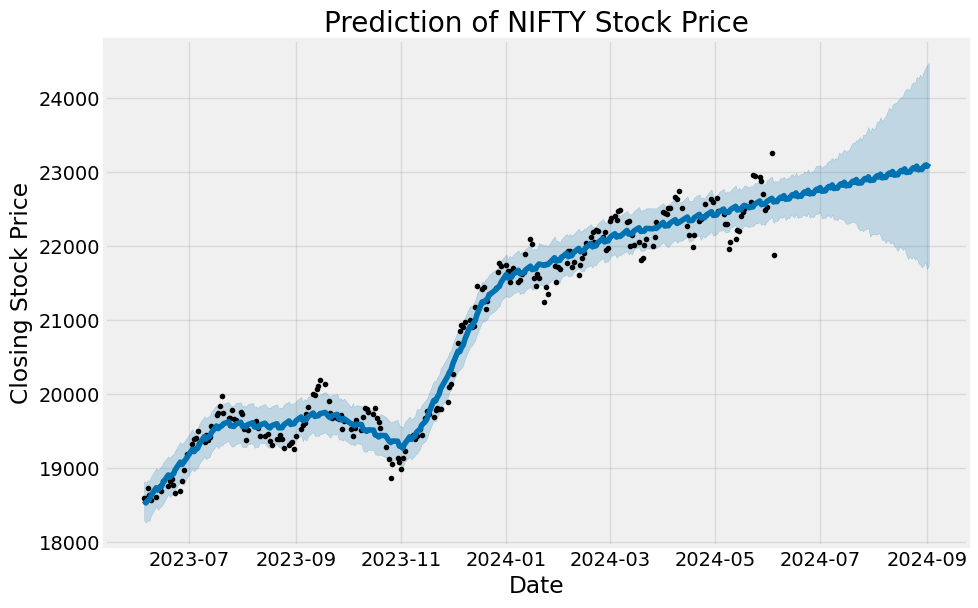

In [ ]:
future = m.make_future_dataframe(periods=90)
predictions = m.predict(future)
m.plot(predictions)
plt.title("Prediction of NIFTY Stock Price")
plt.xlabel("Date")
plt.ylabel("Closing Stock Price")
plt.show()

/usr/local/lib/python3.10/dist-packages/prophet/plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/usr/local/lib/python3.10/dist-packages/prophet/plot.py:397: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  artists += ax.plot(df_y['ds'].dt.to_pydatetime(), seas[name], ls='-',
/usr/local/lib/python3.10/dist-packages/prophet/plot.py:401: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.ar

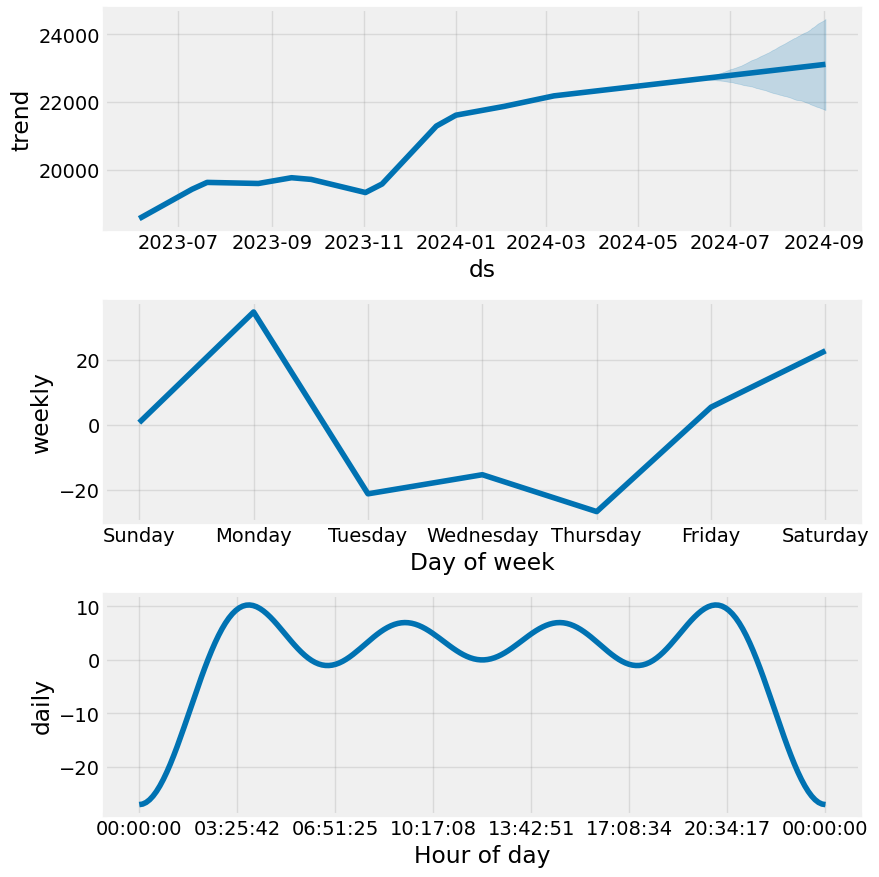

In [ ]:
m.plot_components(predictions)
plt.show()

In [ ]:
future = m.make_future_dataframe(periods=150)
predictions = m.predict(future)

next_month_predictions = predictions[predictions['ds'] > data['ds'].max()]

print("Predicted Prices for the Next Month:")
print(next_month_predictions[['ds', 'yhat', 'yhat_lower', 'yhat_upper']])



Predicted Prices for the Next Month:
            ds          yhat    yhat_lower    yhat_upper
249 2024-06-05  22609.653543  22329.610431  22884.720592
250 2024-06-06  22603.507859  22334.978617  22867.384072
251 2024-06-07  22640.753793  22375.954410  22916.040784
252 2024-06-08  22663.230735  22393.764627  22936.146093
253 2024-06-09  22646.359421  22377.711234  22915.657491
..         ...           ...           ...           ...
394 2024-10-28  23410.648161  20561.290475  26481.321838
395 2024-10-29  23360.005678  20473.724034  26445.414211
396 2024-10-30  23371.055344  20543.094372  26461.969354
397 2024-10-31  23364.909660  20496.314373  26504.236266
398 2024-11-01  23402.155594  20530.031799  26537.559870

[150 rows x 4 columns]


In [ ]:
predicted_price = next_month_predictions.iloc[-1]['yhat_upper']
predicted_date = next_month_predictions.iloc[-1]['ds'].strftime('%d-%m-%Y')

print(f"The predicted price of NIFTY on {predicted_date} is ₹{predicted_price:.2f}.")


The predicted price of NIFTY on 01-11-2024 is ₹26537.56.
